#  Deriving Plank's constant through the photoelectric effect
Author: Ethan Huang Kao

Last edited: 4th of January, 2023

The following is a script which was used to calculate plank's constant, the work function, respective errors, and data analysis including $X^2_{reduced}$ and residuals.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from numpy import sqrt

#establish constants
#speed of light [m/s]
c=299792458

#charge of electron [C]
e=-1.60217663e-19

In [2]:
#wavelength of filters
wavelength_nm = np.array([365,405,426,546,577])

#stopping voltage raw data
v_try1=np.array([-1.758,-1.412,-1.216,-0.660,-0.535])
v_try2=np.array([-1.763,-1.413,-1.207,-0.650,-0.529])
v_try3=np.array([-1.760,-1.415,-1.210,-0.653,-0.530])
v_try4=np.array([-1.761,-1.416,-1.210,-0.654,-0.532])

#length of independent variables
n = len(wavelength_nm)

#degree of best fit
degree = 1

#calculate average at each wavelength and create in array v_mean
v_mean= np.array([0.,0.,0.,0.,0.])

i=0
while i < n:
    v_mean[i]= (v_try1[i]+v_try2[i]+v_try3[i]+v_try4[i])/4
    i=i+1

#convert to m
wavelength_m = wavelength_nm*1e-9

#calculate frequency
frequency = c/wavelength_m

In [3]:
#using reported uncertainty
v_mean_err=[0,0,0,0,0]
v_try1_err=[0,0,0,0,0]
v_try2_err=[0,0,0,0,0]
v_try3_err=[0,0,0,0,0]
v_try4_err=[0,0,0,0,0]

weight_calc=[0,0,0,0,0]

# absolute uncertainty of instrument
v_err=0.001
#need add 0.029

#percentage uncertainty of tunable dc power supply: https://www.brolight.cn/en/BEM-5001.html#_pp=2_2526
power_supply_per=0.01

#percentage uncertainty of dc current amplifier: https://www.brolight.cn/en/BEM-5004.html#_pp=2_2526
current_per=0.002

k=0
while k < n:
    calc_temp=sqrt((v_mean[k]*current_per)**2+(v_mean[k]*power_supply_per)**2 + v_err**2)
    v_mean_err[k]=np.round(calc_temp, 6)
    v_try1_err=sqrt((v_try1[k]*current_per)**2+(v_try1[k]*power_supply_per)**2 + v_err**2)
    v_try2_err=sqrt((v_try2[k]*current_per)**2+(v_try2[k]*power_supply_per)**2 + v_err**2)
    v_try3_err=sqrt((v_try3[k]*current_per)**2+(v_try3[k]*power_supply_per)**2 + v_err**2)
    v_try4_err=sqrt((v_try4[k]*current_per)**2+(v_try4[k]*power_supply_per)**2 + v_err**2)
    weight_calc[k]=1/v_mean_err[k]
    k=k+1

In [4]:
# uncertainty of filter
#https://www.lancaster.ac.uk/media/lancaster-university/content-assets/images/physics/lab-in-a-box/LabInABox_Planck.pdf
wave_m_err = 10e-9

#frequency error
wave_m_perr=wave_m_err/wavelength_m
freq_err=wave_m_perr*frequency

gradient is -252687085662277.72
y-intercept is 385480843397879.4


<IPython.core.display.Javascript object>


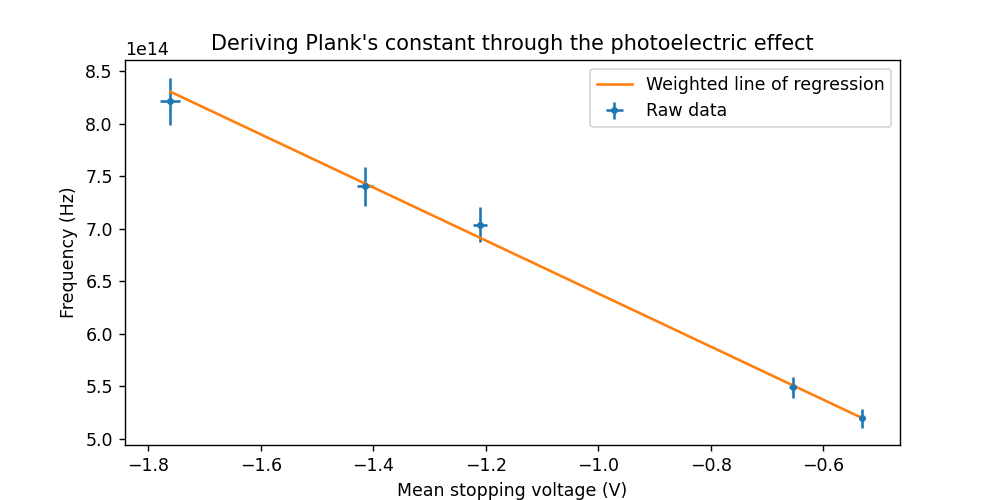

In [5]:
#apply least squares method to find gradient and y-intercept of line of best fit
params_swapw, cov_swapw = np.polyfit(v_mean,frequency,degree,w=1/freq_err, cov='unscaled')
m_swapw, c_swapw = params_swapw
dm_swapw, dc_swapw = np.sqrt(np.diag(cov_swapw))
print("gradient is " + str(m_swapw))
print("y-intercept is " + str(c_swapw))

#plot data points and line of best fit
plt.figure(figsize=(8, 4))
plt.errorbar(v_mean,frequency,yerr=freq_err,xerr=v_mean_err,fmt='.',label="Raw data")
plt.plot(v_mean,m_swapw*v_mean+c_swapw,'-',label="Weighted line of regression")

plt.title("Deriving Plank's constant through the photoelectric effect")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Mean stopping voltage (V)") 
plt.legend(loc="best")
plt.savefig("graph.png")

In [6]:
h = e/m_swapw
print("plank's constant: " + str(h) + " Js")
h_err = (dm_swapw/m_swapw) * h
print("plank's constant error: " + str(h_err) + " Js")

wf = c_swapw * h
print("work function: " + str(wf) + " J")
wf_err = (dc_swapw/c_swapw)*wf
print("work function error: " + str(wf_err) + " J")

plank's constant: 6.340556050978193e-34 Js
plank's constant error: -3.675743108113656e-35 Js
work function: 2.444162894142601e-19 J
work function error: 8.39310300407227e-21 J


<IPython.core.display.Javascript object>


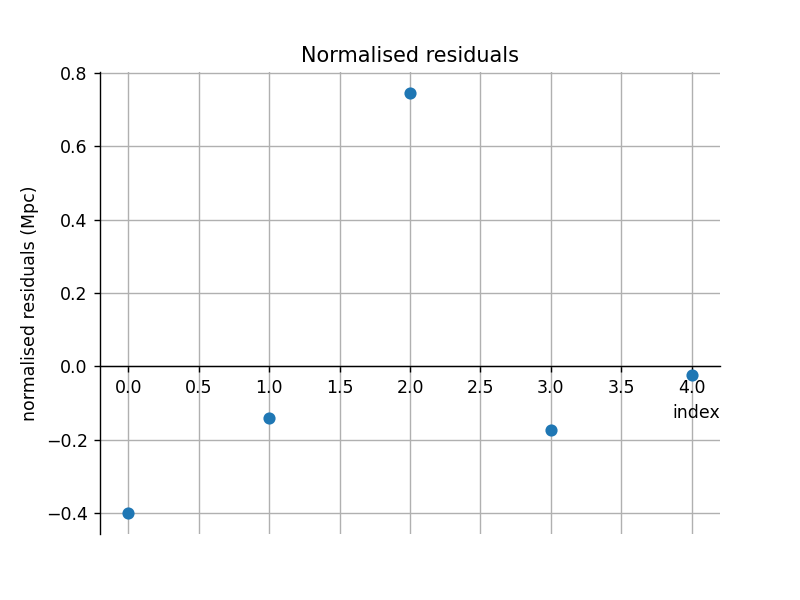

In [7]:
#calculate predicted f values based on gradient and y-intercept
pred_f = m_swapw*v_mean+c_swapw
#calculate residuals
resid_w_mean=frequency-pred_f
#calculate normalised residuals
resid_w_norm=resid_w_mean/freq_err

#plot normalised residuals
plt.figure()
axes = plt.gca()
axes.spines['bottom'].set_position('zero')
axes.spines['top'].set_color('none')
axes.spines['right'].set_color('none')
plt.grid()
plt.title("Normalised residuals")
plt.xlabel('index',loc='right')
plt.ylabel('normalised residuals (Mpc)')

plt.plot(resid_w_norm,'o', label = "Residuals of mean")

In [9]:
#define function to calculate chi2 and chi2_reduced
def chi(array):
    #degrees of freedom
    k=n-degree-1
    chi2=np.sum(array**2)
    chi2=np.round(chi2,4)
    chi2_reduce = chi2/k
    return chi2, chi2_reduce

x2_w_mean , x2_red_w_mean= chi(resid_w_norm)
print(f"X2: {x2_w_mean:.4f}")
print(f"X2 reduced: {x2_red_w_mean:.4f}")

X2: 0.7651
X2 reduced: 0.2550
